# Electricity Consumption Forecasting Using Prophet

This example uses the Prophet model to forecast mean temperature using monthly data for Dublin Airport, Ireland. The time series ranges from November 1941 - January 2018.

#### Attributions

The below code uses the [Prophet](https://github.com/facebook/prophet) library, which has been made available by Facebook under the MIT License. Modifications have been made where appropriate for conducting analysis on the dataset specific to this example.

The copyright and permission notices are included below in accordance with the terms of the license:

Copyright (c) Facebook, Inc. and its affiliates.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

The weather data used in this example is sourced from the [Met Eireann](https://www.met.ie/climate/available-data/historical-data) website.

The below work and findings are not endorsed by the original authors in any way.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dataset = pd.read_csv('electricity-prophet-format.csv')
dataset

date  consumption
0    2011-03-29  4981.500193
1    2011-03-30  5166.600164
2    2011-03-31  3046.350145
3    2011-04-01  3101.100138
4    2011-04-02  4908.600164
..          ...          ...
675  2013-02-01  4390.000000
676  2013-02-02  4385.000000
677  2013-02-03  4289.500000
678  2013-02-04  2564.000000
679  2013-02-05  2383.000000

[680 rows x 2 columns]

In [2]:
consumption=dataset['consumption']
consumption=np.array(consumption)

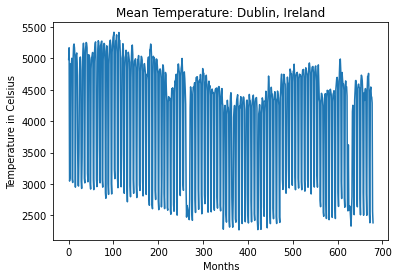

In [3]:
plt.plot(consumption)
plt.title("Mean Temperature: Dublin, Ireland")
plt.xlabel("Months")
plt.ylabel("Temperature in Celsius")
plt.show()

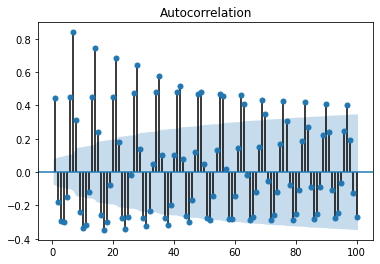

In [4]:
plot_acf(consumption, lags=100, zero=False);

In [5]:
from fbprophet import Prophet
Prophet()

In [6]:
train_df=dataset[:544]
train_df

date  consumption
0    2011-03-29  4981.500193
1    2011-03-30  5166.600164
2    2011-03-31  3046.350145
3    2011-04-01  3101.100138
4    2011-04-02  4908.600164
..          ...          ...
539  2012-09-18  4719.000000
540  2012-09-19  2980.000000
541  2012-09-20  2841.500000
542  2012-09-21  4770.000000
543  2012-09-22  4856.500000

[544 rows x 2 columns]

In [7]:
test_df=dataset[544:680]
test_df

date  consumption
544  2012-09-23       4862.5
545  2012-09-24       4869.5
546  2012-09-25       4768.0
547  2012-09-26       3175.5
548  2012-09-27       2951.5
..          ...          ...
675  2013-02-01       4390.0
676  2013-02-02       4385.0
677  2013-02-03       4289.5
678  2013-02-04       2564.0
679  2013-02-05       2383.0

[136 rows x 2 columns]

In [8]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['date']
train_dataset['y']= train_df['consumption']
train_dataset.head(10)

ds            y
0  2011-03-29  4981.500193
1  2011-03-30  5166.600164
2  2011-03-31  3046.350145
3  2011-04-01  3101.100138
4  2011-04-02  4908.600164
5  2011-04-03  4858.500177
6  2011-04-04  4905.000198
7  2011-04-05  4999.950195
8  2011-04-06  3075.900131
9  2011-04-07  3023.550144

In [9]:
from fbprophet.plot import plot_plotly

import plotly.offline as py
py.init_notebook_mode()

In [10]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future= prophet_basic.make_future_dataframe(periods=136, freq='D')
future.tail(15)

ds
665 2013-01-22
666 2013-01-23
667 2013-01-24
668 2013-01-25
669 2013-01-26
670 2013-01-27
671 2013-01-28
672 2013-01-29
673 2013-01-30
674 2013-01-31
675 2013-02-01
676 2013-02-02
677 2013-02-03
678 2013-02-04
679 2013-02-05

In [12]:
forecast=prophet_basic.predict(future)

In [13]:
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2011-03-29  4488.885175  3790.047937  5999.229692  4488.885175   
1   2011-03-30  4487.207335  3162.183652  5351.461398  4487.207335   
2   2011-03-31  4485.529495  2878.015627  5227.576937  4485.529495   
3   2011-04-01  4483.851655  3336.711592  5560.223342  4483.851655   
4   2011-04-02  4482.173815  3234.830753  5600.397910  4482.173815   
..         ...          ...          ...          ...          ...   
675 2013-02-01  4082.151000  3032.263902  5147.155325  4051.935126   
676 2013-02-02  4082.843020  2944.579573  5012.786631  4052.103025   
677 2013-02-03  4083.535040  2987.065445  5206.201266  4052.432656   
678 2013-02-04  4084.227060  3337.560188  5646.331213  4052.967225   
679 2013-02-05  4084.919079  3278.695507  5587.333450  4053.499529   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    4488.885175      337.441396            337.441396            337.441396   
1    4487.207335     -221.467740           -221.467740           -221.467740   
2    4485.529495     -436.258549           -436.258549           -436.258549   
3    4483.851655       -6.571826             -6.571826             -6.571826   
4    4482.173815      -79.832021            -79.832021            -79.832021   
..           ...             ...                   ...                   ...   
675  4112.098632       -6.571826             -6.571826             -6.571826   
676  4113.107425      -79.832021            -79.832021            -79.832021   
677  4114.131221       32.108805             32.108805             32.108805   
678  4115.211538      374.579936            374.579936            374.579936   
679  4116.335473      337.441396            337.441396            337.441396   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    337.441396    337.441396    337.441396                   0.0   
1   -221.467740   -221.467740   -221.467740                   0.0   
2   -436.258549   -436.258549   -436.258549                   0.0   
3     -6.571826     -6.571826     -6.571826                   0.0   
4    -79.832021    -79.832021    -79.832021                   0.0   
..          ...           ...           ...                   ...   
675   -6.571826     -6.571826     -6.571826                   0.0   
676  -79.832021    -79.832021    -79.832021                   0.0   
677   32.108805     32.108805     32.108805                   0.0   
678  374.579936    374.579936    374.579936                   0.0   
679  337.441396    337.441396    337.441396                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  4826.326571  
1                           0.0                         0.0  4265.739595  
2                           0.0                         0.0  4049.270945  
3                           0.0                         0.0  4477.279828  
4                           0.0                         0.0  4402.341793  
..                          ...                         ...          ...  
675                         0.0                         0.0  4075.579174  
676                         0.0                         0.0  4003.010999  
677                         0.0                         0.0  4115.643844  
678                         0.0                         0.0  4458.806996  
679                         0.0                         0.0  4422.360476  

[680 rows x 16 columns]

In [14]:
yhat=forecast['yhat']
yhat

0      4826.326571
1      4265.739595
2      4049.270945
3      4477.279828
4      4402.341793
          ...     
675    4075.579174
676    4003.010999
677    4115.643844
678    4458.806996
679    4422.360476
Name: yhat, Length: 680, dtype: float64

In [15]:
yhat=yhat[544:680]

In [16]:
test=test_df['consumption']
test

544    4862.5
545    4869.5
546    4768.0
547    3175.5
548    2951.5
        ...  
675    4390.0
676    4385.0
677    4289.5
678    2564.0
679    2383.0
Name: consumption, Length: 136, dtype: float64

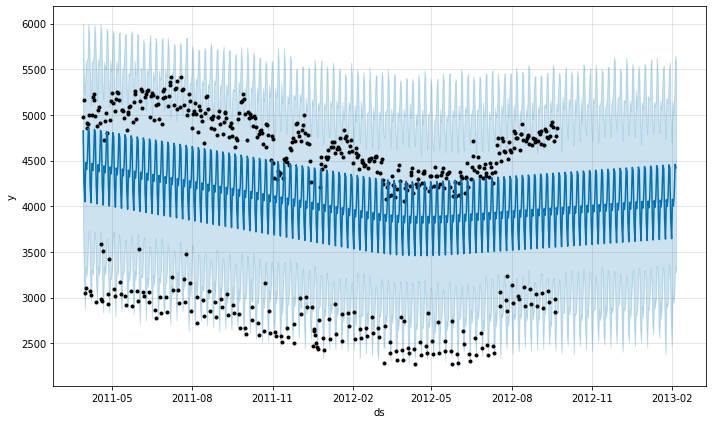

In [17]:
fig1 =prophet_basic.plot(forecast)

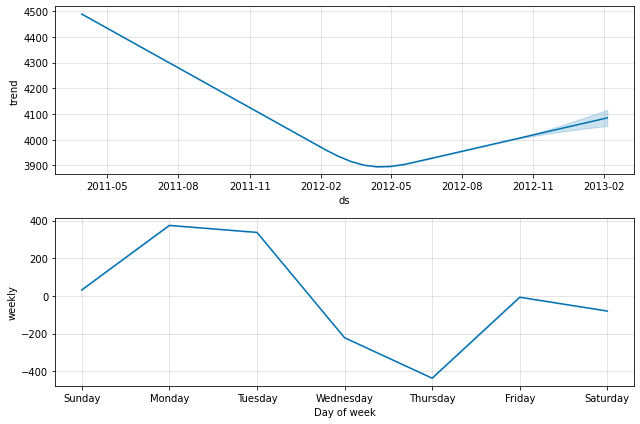

In [18]:
fig1 = prophet_basic.plot_components(forecast)

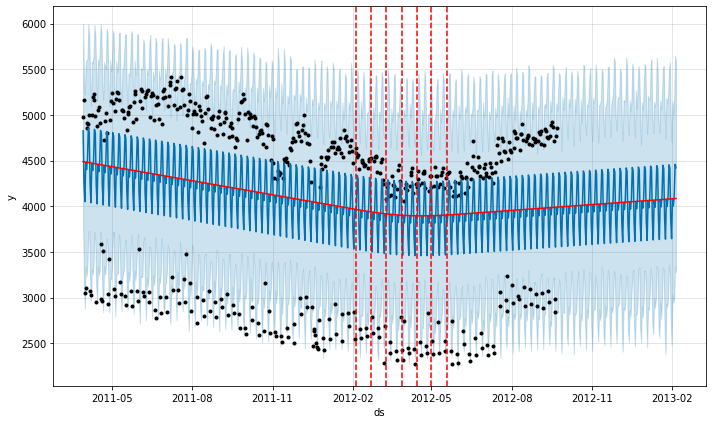

In [19]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [20]:
prophet_basic.changepoints

17    2011-04-15
35    2011-05-03
52    2011-05-20
69    2011-06-06
87    2011-06-24
104   2011-07-11
122   2011-07-29
139   2011-08-15
156   2011-09-01
174   2011-09-19
191   2011-10-06
208   2011-10-23
226   2011-11-10
243   2011-11-27
260   2011-12-14
278   2012-01-01
295   2012-01-18
312   2012-02-04
330   2012-02-22
347   2012-03-10
365   2012-03-28
382   2012-04-14
399   2012-05-01
417   2012-05-19
434   2012-06-05
Name: ds, dtype: datetime64[ns]

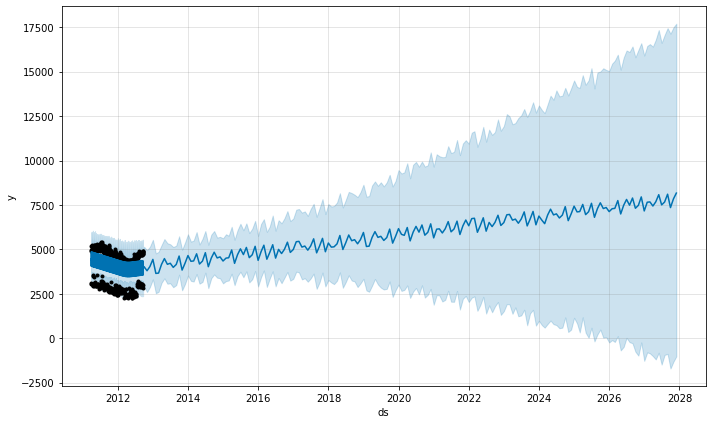

In [21]:
future_data = prophet_basic.make_future_dataframe(periods=183, freq = 'm')
 
forecast_data = prophet_basic.predict(future_data)
prophet_basic.plot(forecast_data);

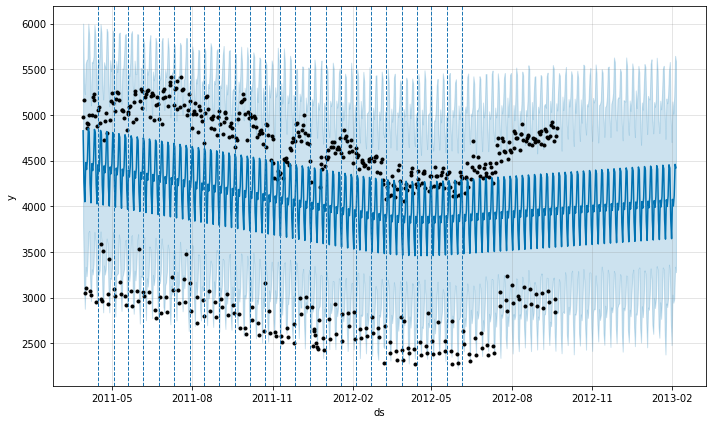

In [22]:
import matplotlib.pyplot as plt

figure = prophet_basic.plot(forecast)
for changepoint in prophet_basic.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [23]:
forecast_data

ds        trend   yhat_lower    yhat_upper  trend_lower  \
0   2011-03-29  4488.885175  3738.566363   5936.823247  4488.885175   
1   2011-03-30  4487.207335  3125.645149   5313.155015  4487.207335   
2   2011-03-31  4485.529495  2886.828266   5163.555524  4485.529495   
3   2011-04-01  4483.851655  3393.144837   5538.497910  4483.851655   
4   2011-04-02  4482.173815  3303.197669   5570.000044  4482.173815   
..         ...          ...          ...           ...          ...   
722 2027-07-31  7745.011246  -942.575905  17062.923676 -1086.426996   
723 2027-08-31  7766.463857  -884.186146  17452.404774 -1149.691831   
724 2027-09-30  7787.224447 -1709.571088  17136.452609 -1218.510545   
725 2027-10-31  7808.677058 -1320.470421  17493.488360 -1290.232470   
726 2027-11-30  7829.437649 -1021.720740  17704.527405 -1354.512586   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     4488.885175      337.441396            337.441396            337.441396   
1     4487.207335     -221.467740           -221.467740           -221.467740   
2     4485.529495     -436.258549           -436.258549           -436.258549   
3     4483.851655       -6.571826             -6.571826             -6.571826   
4     4482.173815      -79.832021            -79.832021            -79.832021   
..            ...             ...                   ...                   ...   
722  16832.134743      -79.832021            -79.832021            -79.832021   
723  16922.139064      337.441396            337.441396            337.441396   
724  17025.196355     -436.258549           -436.258549           -436.258549   
725  17144.375313       32.108805             32.108805             32.108805   
726  17226.353009      337.441396            337.441396            337.441396   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    337.441396    337.441396    337.441396                   0.0   
1   -221.467740   -221.467740   -221.467740                   0.0   
2   -436.258549   -436.258549   -436.258549                   0.0   
3     -6.571826     -6.571826     -6.571826                   0.0   
4    -79.832021    -79.832021    -79.832021                   0.0   
..          ...           ...           ...                   ...   
722  -79.832021    -79.832021    -79.832021                   0.0   
723  337.441396    337.441396    337.441396                   0.0   
724 -436.258549   -436.258549   -436.258549                   0.0   
725   32.108805     32.108805     32.108805                   0.0   
726  337.441396    337.441396    337.441396                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  4826.326571  
1                           0.0                         0.0  4265.739595  
2                           0.0                         0.0  4049.270945  
3                           0.0                         0.0  4477.279828  
4                           0.0                         0.0  4402.341793  
..                          ...                         ...          ...  
722                         0.0                         0.0  7665.179225  
723                         0.0                         0.0  8103.905253  
724                         0.0                         0.0  7350.965898  
725                         0.0                         0.0  7840.785863  
726                         0.0                         0.0  8166.879045  

[727 rows x 16 columns]

In [24]:
yhat=forecast_data['yhat']

In [25]:
yhat

0      4826.326571
1      4265.739595
2      4049.270945
3      4477.279828
4      4402.341793
          ...     
722    7665.179225
723    8103.905253
724    7350.965898
725    7840.785863
726    8166.879045
Name: yhat, Length: 727, dtype: float64

In [26]:
yhat=forecast_data['yhat']
yhat_upper=forecast_data['yhat_upper']
yhat_lower=forecast_data['yhat_lower']

In [27]:
yhat=yhat[544:680]
yhat_upper=yhat_upper[544:680]
yhat_lower=yhat_lower[544:680]

In [28]:
test=test_df['consumption']
test

544    4862.5
545    4869.5
546    4768.0
547    3175.5
548    2951.5
        ...  
675    4390.0
676    4385.0
677    4289.5
678    2564.0
679    2383.0
Name: consumption, Length: 136, dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, yhat)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2011.951977


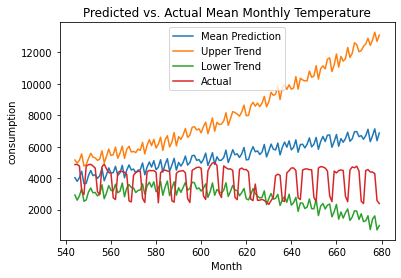

In [30]:
import matplotlib.pyplot as plt

predictons, =plt.plot(yhat, label='Mean Prediction')
upper, =plt.plot(yhat_upper, label='Upper Trend')
lower, =plt.plot(yhat_lower, label='Lower Trend')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Month')
plt.ylabel('consumption')
plt.title("Predicted vs. Actual Mean Monthly Temperature")
plt.legend(loc = 'upper center')
plt.show()

In [31]:
np.mean(test)

3905.8786764705883